In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings

Looking at the data, we observe their types and possible values. 

In [2]:
# loading csv file with pandas
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We find that Age and Cabin have missing values. 

In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# further specification of data types
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

By intuition and at first glance, the values of passengerId, Cabin, and Name do not suggest that they would have any value in trying to understand whether or not a passenger survived. PassengerId and cabin are random, unique numbers given to every participant, while Name is something unique to every person and certainly not related to surviving the titanic crash. 

## Observing correlation between all numeric features and survived

A correlation plot of all the numeric variables reveals that survival has a very small positive correlation with Fare and Parch. Additionally, SibSp an Parch have a rather strong positive correlation. Overall, this correlation plot does not seem that accurate. It would be expected that Pclass would be very informative as to whether or not a passenger survived. This correlation plot is not considered too much and we explore the attributes seperately below. 

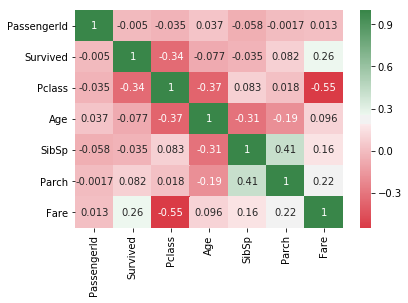

In [14]:
corr = train_data.corr()
heat_map = sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(10, 133, as_cmap=True))
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.savefig('titanic_corr.png')

In [7]:
train_data.groupby(['SibSp', 'Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

## Observing general stats about the variables

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Since age has missing values, and it could very well be that this influenced who surived the titanic, all of its missing values are filled with the mean of the age data. 

In [9]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
certain_attributes = train_data[['Age', 'SibSp', 'Parch', 'Fare']]

In [12]:
certain_attributes.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


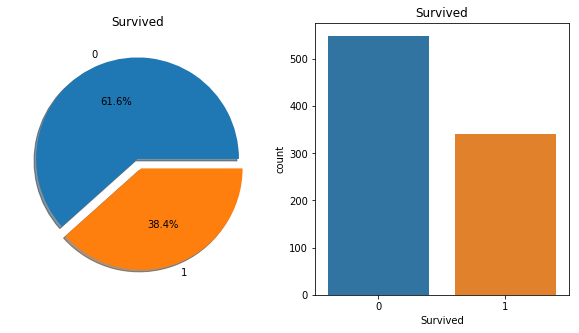

In [13]:
# overall survival rate
f,ax=plt.subplots(1,2,figsize=(10,5))
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### looking at gender and survival

In [14]:
# analyzing attributes
# sex vs survival
sex_survival_count = train_data.groupby(['Sex', 'Survived'])['Survived'].count()
sex_survival_count

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [15]:
# overall survival
female_percent = 233/(891)
print(round(female_percent,2))
male_percent = 109/(891)
print(round(male_percent,2))
print()
# survival within gender
female_percent = 233/(81+233)
print(round(female_percent, 2))
male_percent = 109/(109+468)
print(round(male_percent, 2))

0.26
0.12

0.74
0.19


In [16]:
train_data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


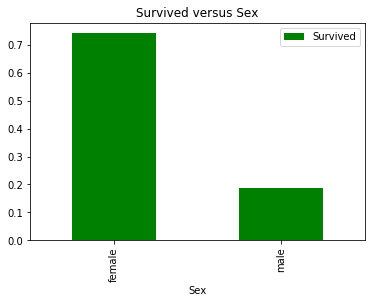

In [17]:
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(title='Survived versus Sex', color="g")
plt.savefig('SurvivedvsSex')

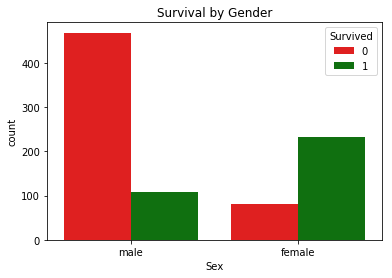

In [18]:
sns.countplot('Sex', hue='Survived', data=train_data, palette={0: "r", 1: "g"})
plt.title('Survival by Gender')
plt.savefig('survival_vs_sex.png')

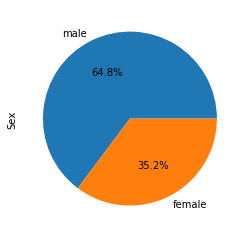

In [19]:
# male passengers compared to females
train_data['Sex'].value_counts().plot.pie(autopct='%1.1f%%')

* Below is a violin chart considering age with gender survival. When looking at the distribution of ages within the genders, it appears that age does not really make a difference in terms of female survival while younger males were more likely to survive and males between the age 20-40 were more likely to die.  

C:\Users\annag\Anaconda3\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


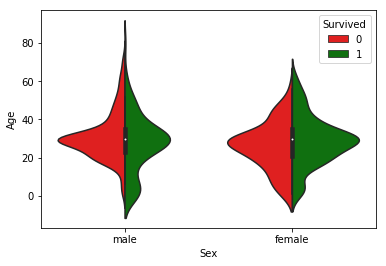

In [20]:
fig = plt.figure()
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=train_data, 
               split=True,
               palette={0: "r", 1: "g"}
              )
plt.savefig('age_sex_survival.png')

### exploring pclass

#### NB:
In the pie chart below, the outer circle represents the number of passengers per class and the inner circle represents the amount of people per class that survived (pink) and did not survive (purple). It appears that the majority of the passengers were in class 3, but that most of these passengers did not survive. As one might expect, the majority of the passengers in class 1 did survive. The passengers in class 2 seem to have had almost a 50/50 chance of survival.

In [21]:
train_data.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

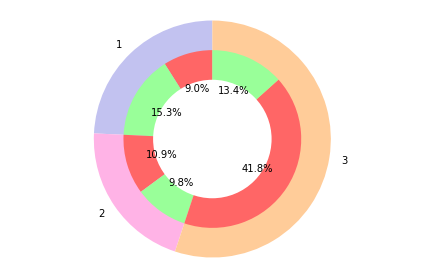

In [22]:
pclass = [1, 2, 3]
sizes = [216, 184, 491]
pclass_survived = [1,0,1,0,1,0]

sizes_survived = [80, 136, 97, 87, 372,119]
colors = ['#c2c2f0', '#ffb3e6', '#ffcc99']
colors_survived = ['#ff6666','#99ff99', '#ff6666','#99ff99', '#ff6666', '#99ff99']

plt.pie(sizes, labels=pclass, colors=colors, startangle=90, frame=True)
plt.pie(sizes_survived, colors=colors_survived, radius=0.75, startangle=90, autopct='%.1f%%')
center_circle = plt.Circle((0,0), 0.5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal') 
plt.tight_layout()
plt.savefig('survival_pclass.png')

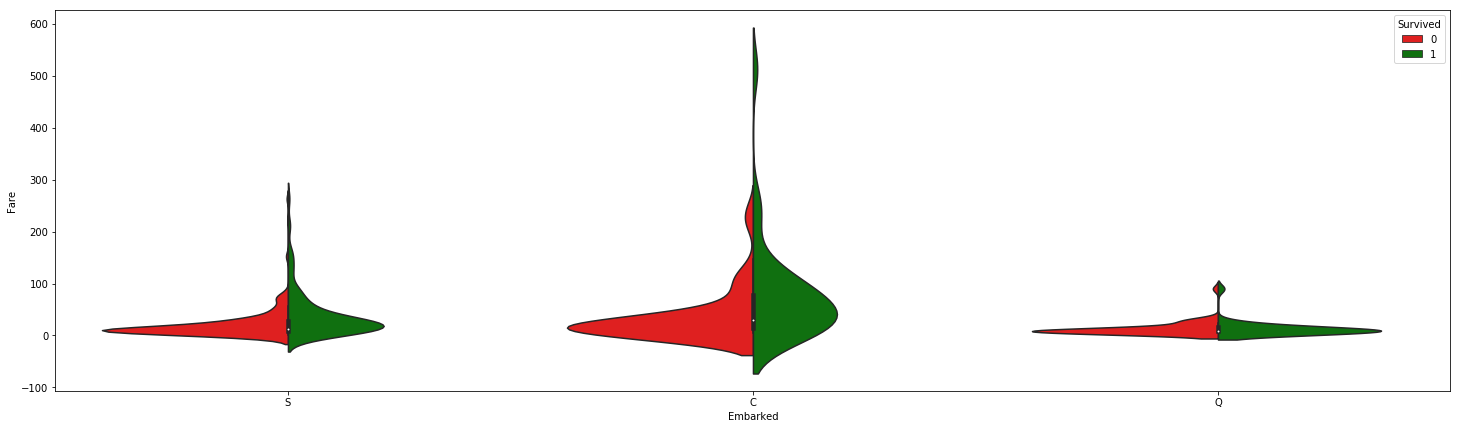

In [26]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=train_data, split=True, palette={0: "r", 1: "g"});
plt.savefig('embarked_fare_survival.png')

In [27]:
# Since I noticed there were negative values in the violin plot, I wanted to see if there are any negative values in the Fare 
# data. However, it turns out there is not. 
s = train_data['Fare']
any(s<0)

False

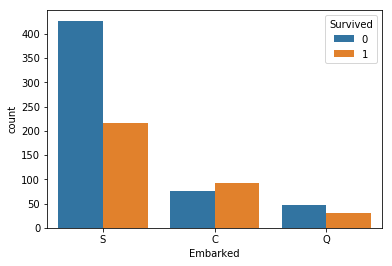

In [28]:
sns.countplot('Embarked',hue='Survived',data=train_data)

From these 2 grpahs above we can see that people more people survived than died. Interestingly, we also see that this is where the most expensive fares were purchased.